In [2]:
!pip install seaborn

     -------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


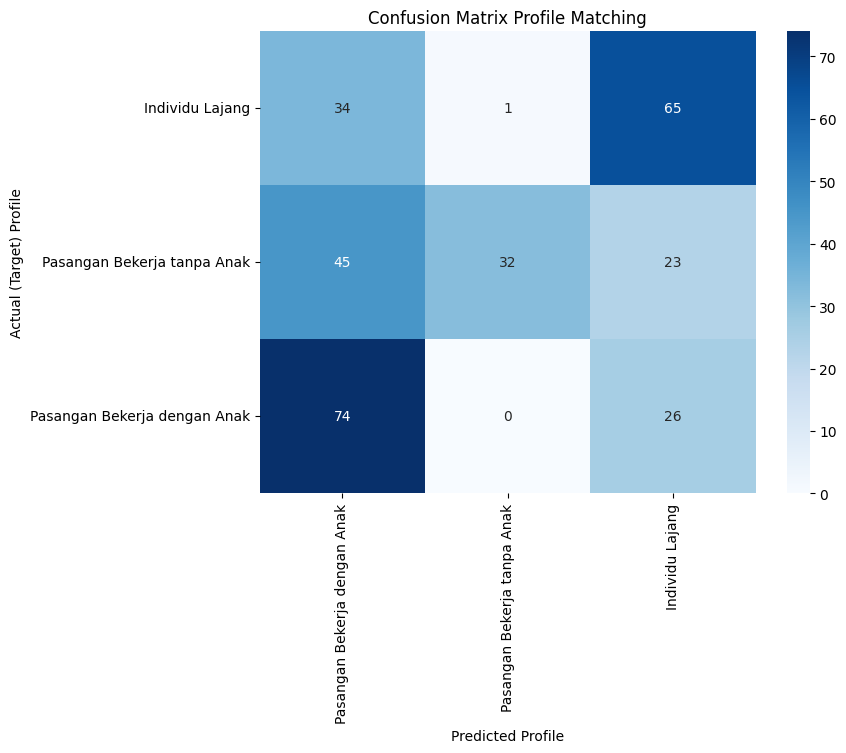

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- Load data CSV ---
df = pd.read_csv("results_profile_matching1.csv")

# 1. Definisikan label untuk sumbu Y (urutan asli dan tidak diubah)
y_labels = ["Individu Lajang", "Pasangan Bekerja tanpa Anak", "Pasangan Bekerja dengan Anak"]

# 2. Definisikan label untuk sumbu X (urutan baru yang diinginkan)
x_labels = ["Pasangan Bekerja dengan Anak", "Pasangan Bekerja tanpa Anak", "Individu Lajang"]

# 3. Hitung confusion matrix menggunakan urutan ASLI (y_labels)
# Ini menghasilkan matriks di mana kolomnya masih berurutan sesuai y_labels
cm = confusion_matrix(df["profile_target"], df["predicted_persona"], labels=y_labels)

# 4. Susun ulang HANYA KOLOM dari matriks agar sesuai urutan x_labels
# Urutan kolom asli: [0, 1, 2] -> "Individu Lajang", "Pasangan tanpa Anak", "Pasangan dengan Anak"
# Urutan kolom baru: [2, 1, 0] -> "Pasangan dengan Anak", "Pasangan tanpa Anak", "Individu Lajang"
cm_reordered_cols = cm[:, [2, 1, 0]]

# 5. Plot matriks yang kolomnya sudah diubah, dengan label yang sesuai
plt.figure(figsize=(8,6))
sns.heatmap(
    cm_reordered_cols,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=x_labels,  # Gunakan label untuk sumbu X yang baru
    yticklabels=y_labels   # Gunakan label untuk sumbu Y yang asli
)
plt.xlabel("Predicted Profile")
plt.ylabel("Actual (Target) Profile")
plt.title("Confusion Matrix Profile Matching")
plt.show()

In [1]:
import pandas as pd

# Load file CSV hasil profile matching
df_results = pd.read_csv("results_profile_matching1.csv")

In [2]:
# Hitung akurasi per kombinasi profile_target dan level
accuracy_per_profile_level = df_results.groupby(['profile_target', 'level']).apply(
    lambda g: (g['profile_target'] == g['predicted_persona']).sum() / len(g) * 100
).reset_index(name='accuracy_percent')

C:\Users\madea\AppData\Local\Temp\ipykernel_8076\1716546617.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_per_profile_level = df_results.groupby(['profile_target', 'level']).apply(


In [3]:
# Buat dictionary summary
accuracy_summary = {}
for profile in df_results['profile_target'].unique():
    sub_df = accuracy_per_profile_level[accuracy_per_profile_level['profile_target'] == profile]
    accuracy_summary[profile] = {row['level']: round(row['accuracy_percent'],2) for idx, row in sub_df.iterrows()}

In [4]:
# Tampilkan hasil
print("=== Akurasi Profile Matching Per Profile & Level ===\n")
for profile, levels in accuracy_summary.items():
    print(f"{profile}:")
    for level, acc in levels.items():
        print(f"  level {level} = {acc}% sesuai harapan")
    print()

=== Akurasi Profile Matching Per Profile & Level ===

Individu Lajang:
  level 100% = 100.0% sesuai harapan
  level 25% = 0.0% sesuai harapan
  level 50% = 48.39% sesuai harapan
  level 75% = 95.24% sesuai harapan

Pasangan Bekerja tanpa Anak:
  level 100% = 0.0% sesuai harapan
  level 25% = 0.0% sesuai harapan
  level 50% = 63.33% sesuai harapan
  level 75% = 61.9% sesuai harapan

Pasangan Bekerja dengan Anak:
  level 100% = 100.0% sesuai harapan
  level 25% = 0.0% sesuai harapan
  level 50% = 100.0% sesuai harapan
  level 75% = 100.0% sesuai harapan



In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Load hasil prediksi
df = pd.read_csv("results_profile_matching1.csv")

# Tentukan urutan label
labels = ["Individu Lajang", "Pasangan Bekerja tanpa Anak", "Pasangan Bekerja dengan Anak"]

# Hitung confusion matrix
cm = confusion_matrix(df["profile_target"], df["predicted_persona"], labels=labels)
print("=== Confusion Matrix ===")
print(pd.DataFrame(cm, index=[f"Actual {l}" for l in labels], columns=[f"Pred {l}" for l in labels]))

# Hitung precision, recall, f1-score per kelas
precision = precision_score(df["profile_target"], df["predicted_persona"], labels=labels, average=None, zero_division=0)
recall = recall_score(df["profile_target"], df["predicted_persona"], labels=labels, average=None, zero_division=0)
f1 = f1_score(df["profile_target"], df["predicted_persona"], labels=labels, average=None, zero_division=0)

# Gabungkan jadi dataframe
metrics_df = pd.DataFrame({
    "Persona": labels,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})

print("\n=== Precision, Recall, F1-Score per Persona ===")
print(metrics_df)

# Jika mau ringkasan keseluruhan macro average
print("\n=== Macro Averages ===")
print("Precision (macro):", precision_score(df["profile_target"], df["predicted_persona"], labels=labels, average='macro'))
print("Recall (macro):", recall_score(df["profile_target"], df["predicted_persona"], labels=labels, average='macro'))
print("F1-Score (macro):", f1_score(df["profile_target"], df["predicted_persona"], labels=labels, average='macro'))


=== Confusion Matrix ===
                                     Pred Individu Lajang  \
Actual Individu Lajang                                 65   
Actual Pasangan Bekerja tanpa Anak                     23   
Actual Pasangan Bekerja dengan Anak                    26   

                                     Pred Pasangan Bekerja tanpa Anak  \
Actual Individu Lajang                                              1   
Actual Pasangan Bekerja tanpa Anak                                 32   
Actual Pasangan Bekerja dengan Anak                                 0   

                                     Pred Pasangan Bekerja dengan Anak  
Actual Individu Lajang                                              34  
Actual Pasangan Bekerja tanpa Anak                                  45  
Actual Pasangan Bekerja dengan Anak                                 74  

=== Precision, Recall, F1-Score per Persona ===
                        Persona  Precision  Recall  F1-Score
0               Individu Lajang   0

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Load hasil prediksi
df = pd.read_csv("results_profile_matching1.csv")

# Tentukan urutan label
labels = ["Individu Lajang", "Pasangan Bekerja tanpa Anak", "Pasangan Bekerja dengan Anak"]

# Hitung confusion matrix
cm = confusion_matrix(df["profile_target"], df["predicted_persona"], labels=labels)
print("=== Confusion Matrix ===")
print(pd.DataFrame(cm, index=[f"Actual {l}" for l in labels], columns=[f"Pred {l}" for l in labels]))

# Hitung precision, recall, f1-score pakai sklearn
precision = precision_score(df["profile_target"], df["predicted_persona"], labels=labels, average=None, zero_division=0)
recall = recall_score(df["profile_target"], df["predicted_persona"], labels=labels, average=None, zero_division=0)
f1 = f1_score(df["profile_target"], df["predicted_persona"], labels=labels, average=None, zero_division=0)

metrics_df = pd.DataFrame({
    "Persona": labels,
    "Precision (sklearn)": precision,
    "Recall (sklearn)": recall,
    "F1-Score (sklearn)": f1
})

print("\n=== Precision, Recall, F1-Score (sklearn) per Persona ===")
print(metrics_df)

# Hitung macro average
print("\n=== Macro Averages ===")
print("Precision (macro):", precision_score(df["profile_target"], df["predicted_persona"], labels=labels, average='macro'))
print("Recall (macro):", recall_score(df["profile_target"], df["predicted_persona"], labels=labels, average='macro'))
print("F1-Score (macro):", f1_score(df["profile_target"], df["predicted_persona"], labels=labels, average='macro'))

# ===========================
# Perhitungan manual dari confusion matrix
manual_precision = []
manual_recall = []
manual_f1 = []

for i in range(len(labels)):
    TP = cm[i,i]
    FP = cm[:,i].sum() - TP
    FN = cm[i,:].sum() - TP
    prec = TP / (TP + FP) if (TP + FP) > 0 else 0
    rec = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1m = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
    manual_precision.append(prec)
    manual_recall.append(rec)
    manual_f1.append(f1m)

# Tampilkan hasil manual
manual_df = pd.DataFrame({
    "Persona": labels,
    "Precision (manual)": manual_precision,
    "Recall (manual)": manual_recall,
    "F1-Score (manual)": manual_f1
})

print("\n=== Precision, Recall, F1-Score (Manual) per Persona ===")
print(manual_df)

print("\n=== Macro Averages (Manual) ===")
print("Precision (macro):", np.mean(manual_precision))
print("Recall (macro):", np.mean(manual_recall))
print("F1-Score (macro):", np.mean(manual_f1))


=== Confusion Matrix ===
                                     Pred Individu Lajang  \
Actual Individu Lajang                                 65   
Actual Pasangan Bekerja tanpa Anak                     23   
Actual Pasangan Bekerja dengan Anak                    26   

                                     Pred Pasangan Bekerja tanpa Anak  \
Actual Individu Lajang                                              1   
Actual Pasangan Bekerja tanpa Anak                                 32   
Actual Pasangan Bekerja dengan Anak                                 0   

                                     Pred Pasangan Bekerja dengan Anak  
Actual Individu Lajang                                              34  
Actual Pasangan Bekerja tanpa Anak                                  45  
Actual Pasangan Bekerja dengan Anak                                 74  

=== Precision, Recall, F1-Score (sklearn) per Persona ===
                        Persona  Precision (sklearn)  Recall (sklearn)  \
0           